In [1]:
import numpy as np 
import sys

    
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import matplotlib as mpl
from scipy import signal #for filtering
print("Modules imported")

import pandas as pd
import datetime as datetime

Modules imported


In [2]:
import re 
file="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_22/station.in"
station_id =[]
with open(file) as f:
    f.readline()
    for station in range(int(f.readline())):
        line = f.readline()
        if '!' in line:
            station_id.append(line.split('!')[-1])
        else:
            station_id.append(None)
# print(station_id)

print(len(station_id))

stations = []
for sublist in station_id:
    match = re.search(r'"(.*?)"', sublist)
    if match:
        stations.append(match.group(1).strip())
    else :
        stations.append(sublist.replace("\n", "").strip())
print(len(set(stations)))


for i, station in enumerate(stations):
    print("%d == %s" % (i,station))

306
277
0 == San Joaquin at Antioch
1 == Mokelumne River at Benson's Ferry
2 == Cache Slough
3 == Cache Creek at Yolo
4 == Old River at Coney Island
5 == Clifton Court
6 == Discovery Bay at Indian Slough
7 == Doughty Cut above Grant Line Canal
8 == Sacramento River at Emmaton
9 == Sacramento River at Emmaton
10 == emm upper Emmaton
11 == emm lower Emmaton
12 == Farrar Park
13 == Grant Line Canal at Tracy Rd Bridge
14 == Green's Landing
15 == Harvey O Banks PP
16 == Holland Tract
17 == Harvey O Banks PP
18 == CCWD Old River near Discovery Bay
19 == CCWD Rock Slough PP
20 == Italian Slough Headwater near Byron
21 == Jersey Point
22 == Sacramento River at Mallard Island
23 == Sacramento River at Mallard Island
24 == Middle River at Howard Rd Bridge
25 == San Joaquin at Mossdale Bridge
26 == Middle River at Tracy Blvd
27 == Old River Barrier near DMC (Above)
28 == Old River below Dam
29 == Old River at Bacon Island
30 == Old River at Head
31 == Old River at Byron
32 == Prisoners Point
33 =

In [3]:
len(stations)

306

In [37]:
columns = ['time']
stations_no = [str(i) for i in range(len(stations))]
columns = columns + stations_no



# These outputs are invoked with iout_sta=1, and are found in outputs/staout_[1..,9], corresponding respectively to elev, air pressure, wind u, wind v, T, S, u, v, w. Each output has a simple ASCII format:
# Time(sec), variable @ station 1,2,…. (specified in station.in)

#file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs_barotropic/staout_1"
file13="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_22/outputs/staout_6"# 1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
file14="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_23/outputs/staout_6"

#something weird happened to the excel version of the file, time stamps got messed up

s13 = pd.read_csv(file13, sep='\s+', names=columns,dtype=np.float32) #, decode_times=False)
#s13 = pd.read_csv(file13, sep=',', names=columns,dtype=np.float32)
#s13 = s13.apply(pd.to_numeric)

s14 = pd.read_csv(file14, sep='\s+', names=columns,dtype=np.float32) #, decode_times=False)
#s14 = pd.read_csv(file14, sep=',', names=columns,dtype=np.float32) #,
# #s14 = s14.apply(pd.to_numeric)

#s13.time
# # Add in the number of seconds elapsed @ our chosen timestep
timedelta13 = [pd.Timedelta(i, unit = 's') for i in s13.time]
timestamp13 = [pd.to_datetime("09-10-2020 00:00:00") + i for i in timedelta13]

timedelta14 = [pd.Timedelta(i, unit = 's') for i in s14.time]
timestamp14 = [pd.to_datetime("09-10-2020 00:00:00") + i for i in timedelta14]

s13["time"] = timestamp13
s14["time"] = timestamp14


In [38]:
s14

,time,0,1,2,3,4,5,6,7,8,...,296,297,298,299,300,301,302,303,304,305
0,2020-09-10 03:30:00,1.67306,0.090559,0.098759,-9999.0,0.339022,0.333584,0.347253,0.350770,0.243567,...,0.355034,-999.0,-999.0,0.333807,0.337872,-9999.0,-9999.0,0.311506,0.259562,0.260822
1,2020-09-10 03:45:00,1.60485,0.090560,0.098781,-9999.0,0.339032,0.334026,0.347137,0.350414,0.227010,...,0.355060,-999.0,-999.0,0.333952,0.337834,-9999.0,-9999.0,0.310746,0.258456,0.259486
2,2020-09-10 04:00:00,1.54229,0.090561,0.098820,-9999.0,0.339036,0.334334,0.347033,0.349810,0.212146,...,0.355097,-999.0,-999.0,0.334063,0.337766,-9999.0,-9999.0,0.309880,0.256991,0.257816
3,2020-09-10 04:15:00,1.48668,0.090561,0.098869,-9999.0,0.339032,0.334496,0.346949,0.349338,0.199860,...,0.355145,-999.0,-999.0,0.334136,0.337669,-9999.0,-9999.0,0.308915,0.255421,0.256053
4,2020-09-10 04:30:00,1.43901,0.090562,0.098918,-9999.0,0.339030,0.334604,0.346891,0.349233,0.190360,...,0.355202,-999.0,-999.0,0.334164,0.337546,-9999.0,-9999.0,0.307929,0.253887,0.254323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,2020-11-28 23:00:00,1.73675,0.062958,0.086325,-9999.0,0.279774,0.391700,0.479034,0.332242,0.657701,...,0.318836,-999.0,-999.0,0.338047,0.333969,-9999.0,-9999.0,0.454082,0.521977,0.514249
7674,2020-11-28 23:15:00,1.73065,0.062957,0.086429,-9999.0,0.279780,0.391824,0.478003,0.332489,0.549292,...,0.318621,-999.0,-999.0,0.338478,0.334657,-9999.0,-9999.0,0.462983,0.517230,0.508785
7675,2020-11-28 23:30:00,1.71734,0.062957,0.086515,-9999.0,0.279785,0.391950,0.477027,0.332832,0.465014,...,0.318679,-999.0,-999.0,0.338883,0.335347,-9999.0,-9999.0,0.467927,0.511441,0.503385
7676,2020-11-28 23:45:00,1.71842,0.062956,0.086575,-9999.0,0.279790,0.392070,0.476069,0.333224,0.445454,...,0.318955,-999.0,-999.0,0.339294,0.336074,-9999.0,-9999.0,0.470312,0.505975,0.498451


In [15]:
s13.loc[150:160]

,time,0,1,2,3,4,5,6,7,8,...,296,297,298,299,300,301,302,303,304,305
150,2020-09-11 13:45:00,1.99045,0.090688,0.100999,-9999.0,0.290786,0.336981,0.351725,0.373174,0.518207,...,0.368867,-999.0,-999.000000,0.339420,0.336126,-9999.0,-9999.0,0.251412,0.235601,0.232841
151,2020-09-11 14:00:00,2.01376,0.090687,0.100926,-9999.0,0.289387,0.338261,0.350050,0.373258,0.526574,...,0.368869,-999.0,-999.000000,0.339277,0.336115,-9999.0,-9999.0,0.250377,0.235530,0.232918
152,2020-09-11 14:15:00,2.03443,0.090686,0.100860,-9999.0,0.287897,0.339296,0.348789,0.373382,0.531522,...,0.368868,-999.0,-999.000000,0.339140,0.336180,-9999.0,-9999.0,0.249465,0.235653,0.233160
153,2020-09-11 14:30:00,2.05462,0.090686,0.100800,-9999.0,0.286397,0.340157,0.347987,0.373426,0.533399,...,0.368868,-999.0,-999.000000,0.339008,0.336456,-9999.0,-9999.0,0.248683,0.235950,0.233543
154,2020-09-11 14:45:00,2.07532,0.090686,0.100743,-9999.0,0.284867,0.340880,0.347674,0.373437,0.534029,...,0.368870,-999.0,-999.000000,0.338902,0.336917,-9999.0,-9999.0,0.248039,0.236402,0.234055
155,2020-09-11 15:00:00,2.09681,0.090686,0.100688,-9999.0,0.283485,0.341494,0.347784,0.373458,0.533960,...,0.368874,-999.0,-999.000000,0.338861,0.337442,-9999.0,-9999.0,0.247541,0.236992,0.234688
156,2020-09-11 15:15:00,2.10981,0.090687,0.100632,-9999.0,0.282285,0.342014,0.348269,0.373443,0.528990,...,0.368880,-999.0,-999.000000,0.338809,0.337806,-9999.0,-9999.0,0.247192,0.237685,0.235415
157,2020-09-11 15:30:00,2.10954,0.090688,0.100576,-9999.0,0.281217,0.342454,0.349114,0.373352,0.516709,...,0.368885,-999.0,0.392290,0.338645,0.337872,-9999.0,-9999.0,0.246992,0.238461,0.236214
158,2020-09-11 15:45:00,2.09938,0.090689,0.100518,-9999.0,0.280274,0.342830,0.350235,0.373217,0.498032,...,0.368888,-999.0,0.392336,0.338330,0.337637,-9999.0,-9999.0,0.246928,0.239321,0.237078
159,2020-09-11 16:00:00,2.08192,0.090691,0.100459,-9999.0,0.279481,0.343155,0.351502,0.373072,0.473695,...,0.368889,-999.0,0.392424,0.337880,0.337146,-9999.0,-9999.0,0.246972,0.240266,0.237999


In [ ]:
# pd.read_csv(file13,sep='\s+',names=columns,dtype=np.float32)

In [ ]:
# s13

In [ ]:
# pd.read_csv(file13, sep='\s+', names=columns)

In [ ]:
# timedelta13 = [pd.Timedelta(i, unit = 's') for i in s13.time*0.1]

Axes(0.125,0.11;0.775x0.77)


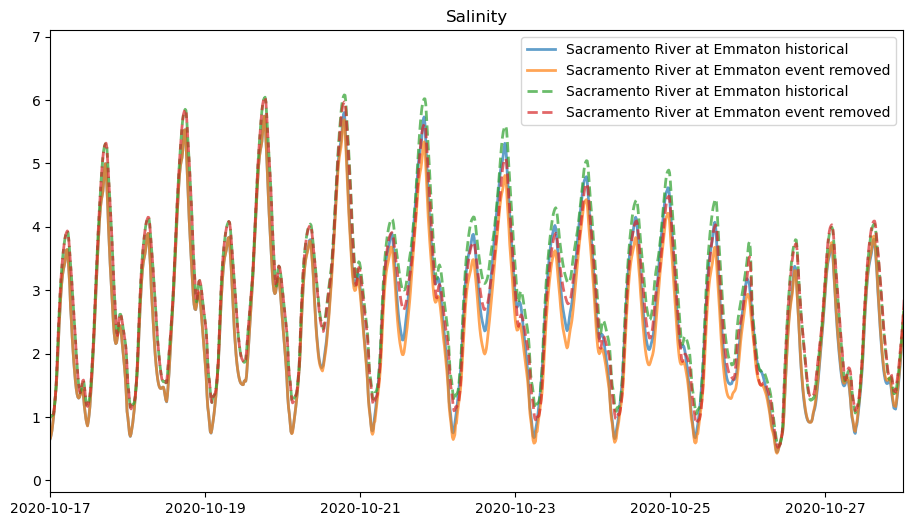

In [19]:
# Make a plot
plt.ioff()

#station_indices=[0, 208, 2, 62, 105]
#station_indices=[47,48,56,7,8,9] #first are 2 martinez, then Old River near Clifton court intake, last 3 are emmaton
station_indices=[8,9]#47,48,56,7,8,9,]
fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    if idx==9:
        ls='--'
    else:
        ls='-'
    values13 = s13[str(idx)]
    ax.plot(s13.time, values13, label = stations[idx]+ " historical", linewidth=2, linestyle=ls, alpha =0.7)
    values14 = s14[str(idx)]
    ax.plot(s14.time, values14, label = stations[idx]+ " event removed", linewidth=2, linestyle=ls,alpha=0.7)
    

leg = ax.legend()
print(ax)
#ax.set_xlim(s13.time.iloc[0], s13.time.iloc[-1])
ax.set_xlim(pd.to_datetime("2020-10-17"),pd.to_datetime("2020-10-28"))
#ax.set_xlim(pd.to_datetime("2020-9-11"),pd.to_datetime("2020-9-25"))
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Salinity")
plt.show()
# ax.grid()



In [43]:
#s14.set_index("time",inplace=True)
s14.index.is_unique

False

In [46]:
np.where(s14.index.duplicated()==1)

(array([1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448]),)

In [48]:
s14.iloc[1437:1449]

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
time,,,,,,,,,,,,,,,,,,,,,
2020-09-25 02:45:00,2.60486,0.065424,0.099224,-9999.0,0.218445,0.263399,0.296688,0.356768,0.917214,0.908179,...,0.387482,-999.0,0.382144,0.333531,0.332527,-9999.0,-9999.0,0.205946,0.213748,0.208398
2020-09-25 00:15:00,4.13537,0.066257,0.098546,-9999.0,0.219561,0.284004,0.273321,0.355467,2.157490,2.387190,...,0.386830,-999.0,0.383533,0.332751,0.331739,-9999.0,-9999.0,0.203642,0.202685,0.201627
2020-09-25 00:30:00,3.78215,0.066138,0.098581,-9999.0,0.218740,0.283890,0.275321,0.354994,1.962540,2.301240,...,0.386898,-999.0,0.383417,0.331930,0.331083,-9999.0,-9999.0,0.203592,0.202399,0.201395
2020-09-25 00:45:00,3.46027,0.066020,0.098635,-9999.0,0.218090,0.283796,0.277704,0.354712,1.757620,2.197020,...,0.386941,-999.0,0.383269,0.331209,0.330574,-9999.0,-9999.0,0.203595,0.202336,0.201301
2020-09-25 01:00:00,3.23996,0.065913,0.098709,-9999.0,0.217569,0.285241,0.280282,0.354691,1.570800,2.059090,...,0.386975,-999.0,0.383110,0.330648,0.330254,-9999.0,-9999.0,0.203646,0.202452,0.201316
2020-09-25 01:15:00,3.05503,0.065820,0.098802,-9999.0,0.216942,0.283130,0.282979,0.354876,1.419680,1.879720,...,0.387016,-999.0,0.382966,0.330282,0.330161,-9999.0,-9999.0,0.203736,0.202696,0.201400
2020-09-25 01:30:00,2.90403,0.065737,0.098915,-9999.0,0.216270,0.276921,0.285941,0.355103,1.287280,1.685190,...,0.387074,-999.0,0.382862,0.330104,0.330300,-9999.0,-9999.0,0.203824,0.203025,0.201524
2020-09-25 01:45:00,2.75042,0.065662,0.099040,-9999.0,0.215808,0.270508,0.289300,0.355173,1.181050,1.495140,...,0.387154,-999.0,0.382866,0.330067,0.330649,-9999.0,-9999.0,0.203860,0.203422,0.201670
2020-09-25 02:00:00,2.61623,0.065595,0.099181,-9999.0,0.215471,0.265832,0.292468,0.355119,1.107520,1.337350,...,0.387247,-999.0,0.382977,0.330092,0.331089,-9999.0,-9999.0,0.203869,0.204088,0.201914


In [41]:
#fill nans
#timebasis = pd.to_datetime("09-10-2020 00:00:00")
#s14 = s14.fillna(-9999)
# s14.set_index("time",inplace=True)
s14_to_filt=s14.asfreq('900s')#,method='ffill')

ValueError: cannot reindex on an axis with duplicate labels

In [40]:
s14_to_filt

,time,0,1,2,3,4,5,6,7,8,...,296,297,298,299,300,301,302,303,304,305
1970-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
path='/expanse/lustre/scratch/jisrael/temp_project/run_schism/'
file13_filt=path+'run_13/outputs/staout_6_filt.csv'
file14_filt=path+'run_14/outputs/staout_6_filt.csv'
file20_filt=path+'run_20/outputs/staout_6_filt.csv'
file21_filt=path+'run_21/outputs/staout_6_filt.csv'
file22_filt=path+'run_22/outputs/staout_6_filt.csv'

In [25]:
#read in the data, drop the NaN rows and set the dates as the index

#df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
s13_filt=pd.read_csv(file13_filt,parse_dates=['time'], date_format={'time': '%Y-%m-%d %H:%M:%S'}).dropna(axis='rows')
s13_filt.set_index("time",inplace=True)
s14_filt=pd.read_csv(file14_filt,parse_dates=['time'], date_format={'time': '%Y-%m-%d %H:%M:%S'}).dropna(axis='rows')
s14_filt.set_index("time",inplace=True)
s20_filt=pd.read_csv(file20_filt,parse_dates=['time'], date_format={'time': '%Y-%m-%d %H:%M:%S'}).dropna(axis='rows')
s20_filt.set_index("time",inplace=True)
s21_filt=pd.read_csv(file21_filt,parse_dates=['time'], date_format={'time': '%Y-%m-%d %H:%M:%S'}).dropna(axis='rows')
s21_filt.set_index("time",inplace=True)
s22_filt=pd.read_csv(file22_filt,parse_dates=['time'], date_format={'time': '%Y-%m-%d %H:%M:%S'}).dropna(axis='rows')
s22_filt.set_index("time",inplace=True)

Axes(0.125,0.11;0.775x0.77)


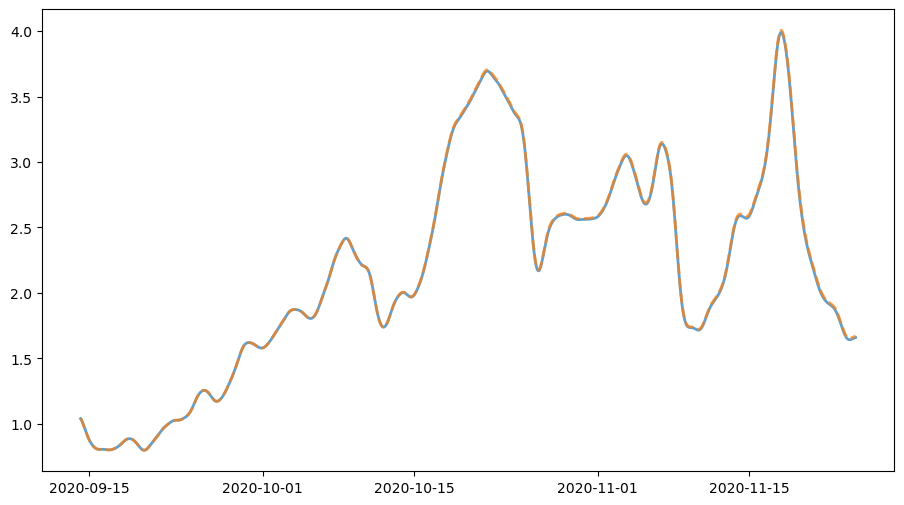

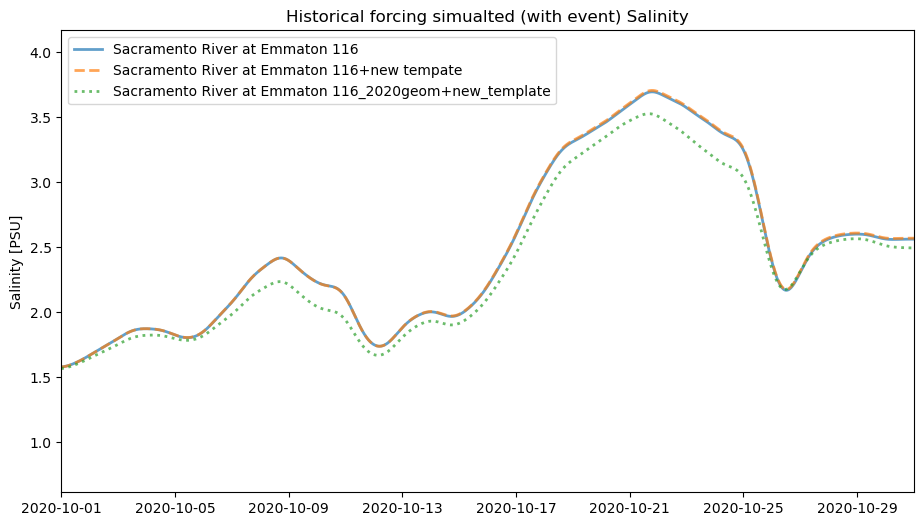

In [27]:
# Make a plot
plt.ioff()

#station_indices=[0, 208, 2, 62, 105]
#station_indices=[47,48,56,7,8,9] #first are 2 martinez, then Old River near Clifton court intake, last 3 are emmaton
station_indices=[9]#47,48,56,7,8,9,]
fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    # if idx==9:
    #     ls='--'
    # else:
    #     ls='-'
    values13_filt = s13_filt[str(idx)]
    values20_filt = s20_filt[str(idx)]
    values22_filt = s22_filt[str(idx)]
    ax.plot(values13_filt, label = stations[idx]+ " 116", linewidth=2, alpha =0.7)
    ax.plot(values20_filt, label = stations[idx]+ " 116+new template", linewidth=2, linestyle='--',alpha=0.7)
    ax.plot(values22_filt, label = stations[idx]+ " 116_2020geom+new_template", linewidth=2, linestyle=':',alpha=0.7)


leg = ax.legend()
print(ax)
ax.set_ylabel('Salinity [PSU]')
#ax.set_xlim(s13.time.iloc[0], s13.time.iloc[-1])
ax.set_xlim(pd.to_datetime("2020-10-01"),pd.to_datetime("2020-10-31"))
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Historical forcing simulation (with event) Salinity")
plt.show()
# ax.grid()



Axes(0.125,0.11;0.775x0.77)


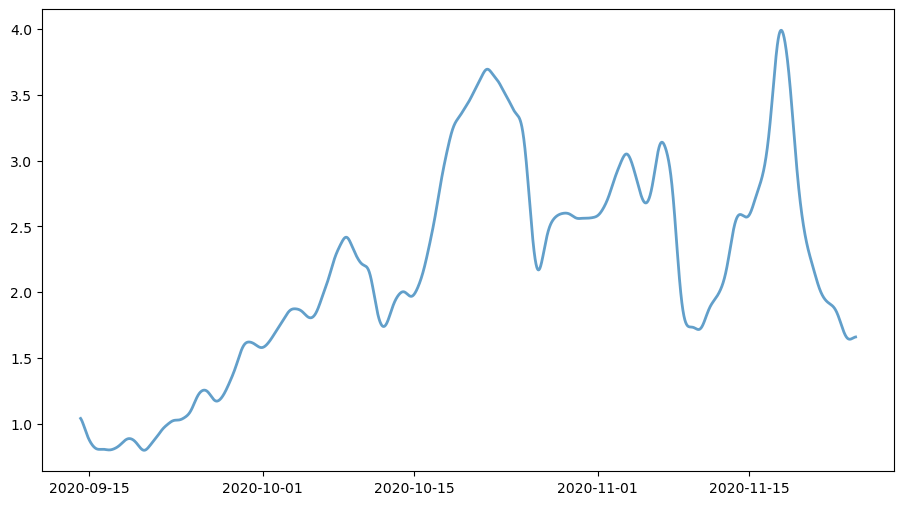

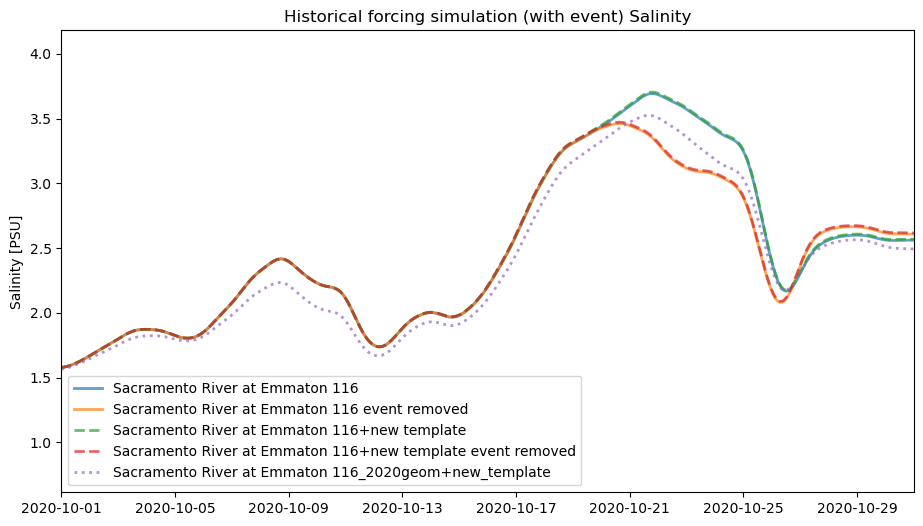

In [29]:
# Make a plot
plt.ioff()

#station_indices=[0, 208, 2, 62, 105]
#station_indices=[47,48,56,7,8,9] #first are 2 martinez, then Old River near Clifton court intake, last 3 are emmaton
station_indices=[9]#47,48,56,7,8,9,]
fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    # if idx==9:
    #     ls='--'
    # else:
    #     ls='-'
    values13_filt = s13_filt[str(idx)]
    values14_filt = s14_filt[str(idx)]
    values20_filt = s20_filt[str(idx)]
    values21_filt = s21_filt[str(idx)]
    values22_filt = s22_filt[str(idx)]
    ax.plot(values13_filt, label = stations[idx]+ " 116", linewidth=2, alpha =0.7)
    ax.plot(values14_filt, label = stations[idx]+ " 116 event removed", linewidth=2, alpha =0.7)
    ax.plot(values20_filt, label = stations[idx]+ " 116+new template", linewidth=2, linestyle='--',alpha=0.7)
    ax.plot(values21_filt, label = stations[idx]+ " 116+new template event removed", linewidth=2, linestyle='--',alpha=0.7)
    ax.plot(values22_filt, label = stations[idx]+ " 116_2020geom+new_template", linewidth=2, linestyle=':',alpha=0.7)


leg = ax.legend()
print(ax)
ax.set_ylabel('Salinity [PSU]')
#ax.set_xlim(s13.time.iloc[0], s13.time.iloc[-1])
ax.set_xlim(pd.to_datetime("2020-10-01"),pd.to_datetime("2020-10-31"))
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Historical forcing simulation (with event) Salinity")
plt.show()
# ax.grid()

